In [9]:
# Obviously
import pandas as pd
import numpy as np

# Plotting set-up
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
# Command to reset plot styles to default: mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-poster')
mpl.rcParams['font.family'] = 'serif'
% matplotlib inline

# Other packages we might need
#! pip install quandl
import quandl

# Options
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = '/Users/shannonmoran/0-Datathon/data/'

height has been deprecated.



In [10]:
ls /Users/shannonmoran/0-Datathon/data/

calendar.csv.gz     econ_state.csv      real_estate.csv.gz
demographics.csv    listings.csv        venues.csv.gz


In [37]:
listings = pd.read_csv(data_folder + 'listings.csv')
venues = pd.read_csv(data_folder + 'venues.csv.gz')
real_estate = pd.read_csv(data_folder + 'real_estate.csv.gz')
# calendar = pd.read_csv(data_folder + 'calendar.csv.gz', parse_dates=True)
demographics = pd.read_csv(data_folder + 'demographics.csv')
econ_state = pd.read_csv(data_folder + 'econ_state.csv')

In [19]:
listings.dtypes

accommodates                   float64
amenities                       object
availability_30                  int64
bathrooms                      float64
bed_type                        object
bedrooms                       float64
beds                           float64
cancellation_policy             object
city                            object
has_availability               float64
host_id                          int64
id                               int64
instant_bookable                object
latitude                       float64
longitude                      float64
metropolitan                    object
name                            object
price                           object
property_type                   object
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_rating           float64
review_scores_value            float64
room_type                

# Understanding what listings we have
Data is largely LA-- do we have the demographics data from this?

In [18]:
listings['metropolitan'].unique()

array(['asheville', 'austin', 'nashville', 'new_orleans', 'LA'], dtype=object)

In [22]:
listings.groupby("metropolitan")["zipcode"].count()

metropolitan
LA             30822
asheville        862
austin          9551
nashville       3246
new_orleans     5260
Name: zipcode, dtype: int64

In [23]:
listings[listings.metropolitan=='LA'].head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
19110,10.0,"{""Wireless Internet"",""Air conditioning"",Pool,K...",27,7.0,Real Bed,5.0,5.0,strict,acton,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,CA,NaN,93510
19111,2.0,{},29,1.0,Real Bed,1.0,1.0,flexible,palmdale,NaN,...,10.0,10.0,10.0,9.0,93.0,9.0,Private room,CA,NaN,93550
19112,2.0,"{""Wireless Internet"",""Air conditioning"",""Wheel...",18,1.0,Real Bed,1.0,1.0,flexible,acton,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,CA,NaN,93510
19113,6.0,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",3,1.0,Real Bed,1.0,3.0,flexible,acton,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Entire home/apt,CA,NaN,93510
19114,1.0,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",0,1.0,Real Bed,1.0,1.0,flexible,los angeles,NaN,...,10.0,9.0,10.0,9.0,93.0,10.0,Private room,CA,NaN,90007


# Demographics data
Have for all zip codes

In [30]:
demographics['zipcode'].unique()

array([  601,   602,   603, ..., 99926, 99927, 99929])

# Saturation by zip code versus population
1. Get number of airbnb by zip code
2. Populations for those zip code
3. 

In [39]:
real_estate.loc[real_estate['type']=='ZRI']

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
13200,ZRI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,3715,3681,3664,3674.0,3689,3696,3696,3691,3680,3669
13201,ZRI,60657,Chicago,IL,Chicago,Cook,2,NaN,NaN,NaN,...,2117,2127,2122,2115.0,2105,2092,2078,2068,2071,2083
13202,ZRI,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,4015,3965,3925,3902.0,3918,3920,3935,3932,3961,3983
13203,ZRI,60614,Chicago,IL,Chicago,Cook,4,NaN,NaN,NaN,...,2345,2344,2351,2351.0,2354,2342,2324,2311,2308,2323
13204,ZRI,79936,El Paso,TX,El Paso,El Paso,5,NaN,NaN,NaN,...,1014,1013,1006,1000.0,998,1000,1001,1001,999,998
13205,ZRI,10002,New York,NY,New York,New York,6,NaN,NaN,NaN,...,3756,3722,3677,3629.0,3591,3578,3575,3576,3592,3609
13206,ZRI,60640,Chicago,IL,Chicago,Cook,7,NaN,NaN,NaN,...,1659,1662,1655,1653.0,1646,1650,1653,1658,1658,1656
13207,ZRI,10467,New York,NY,New York,Bronx,8,NaN,NaN,NaN,...,1745,1723,1703,1678.0,1665,1672,1691,1708,1719,1728
13208,ZRI,77084,Houston,TX,Houston,Harris,9,NaN,NaN,NaN,...,1438,1439,1440,1441.0,1439,1433,1423,1415,1410,1413
13209,ZRI,94109,San Francisco,CA,San Francisco,San Francisco,10,NaN,NaN,NaN,...,4534,4531,4520,4492.0,4461,4450,4449,4451,4449,4444


In [48]:
demand = pd.read_csv(data_folder + 'demand_dimensions.csv')

In [49]:
demand

,zipcode,airbnb_number,airbnb_avg_price,households,airbnb_10khousehold,zri,median_income,metro
0,70112,339,285.731563,1494,226.907631,NaN,31864,new_orleans
1,37201,114,260.973684,681,167.400881,1742.000000,58508,nashville
2,78702,1202,319.301997,8337,144.176562,1907.444444,41016,austin
3,90291,1731,205.437897,13779,125.625952,5555.944444,80111,LA
4,70116,753,214.467463,6235,120.769848,1873.611111,31936,new_orleans
5,70130,780,241.326923,8061,96.762188,2192.000000,50135,new_orleans
6,78704,1994,325.594784,22043,90.459556,2360.833333,58601,austin
7,78701,387,401.059432,4366,88.639487,2427.722222,96455,austin
8,90290,185,237.243243,2347,78.824031,4411.555556,99505,LA
9,78722,205,245.282927,2973,68.953919,2100.944444,64929,austin


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126ed8668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ad6e7f0>]], dtype=object)

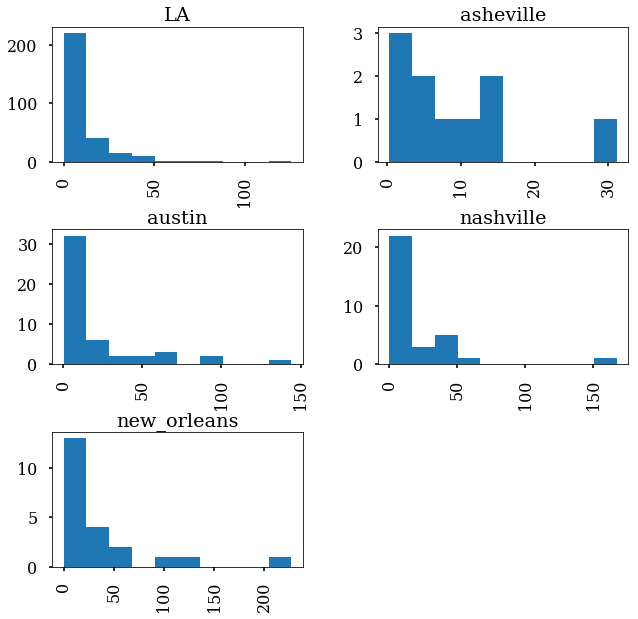

In [53]:
demand['airbnb_10khousehold'].hist(by=demand['metro'],figsize=(10,10))

In [75]:
demand[demand['metro']=='austin']['airbnb_10khousehold'].values

array([ 144.1765623 ,   90.45955632,   88.63948694,   68.9539186 ,
         65.80565806,   58.47886029,   57.66107201,   45.73754789,
         31.2732319 ,   29.71869328,   27.94228042,   27.10622711,
         20.24859663,   20.05231037,   18.50627892,   17.43786901,
         14.11795751,   13.7537739 ,   12.39669421,   12.24555997,
         11.43926789,   10.04044066,    9.81206129,    9.36381162,
          8.99168693,    8.82912252,    8.82891887,    7.62527233,
          7.49711649,    7.32600733,    7.21153846,    7.20984442,
          5.8338519 ,    5.79315904,    5.71708592,    5.08905852,
          4.83091787,    4.71293916,    4.47620543,    3.67680029,
          3.24613328,    3.21610125,    1.29463804,    0.49578582,
          0.31857279,    0.1866368 ,    0.17208742,    0.16083635])

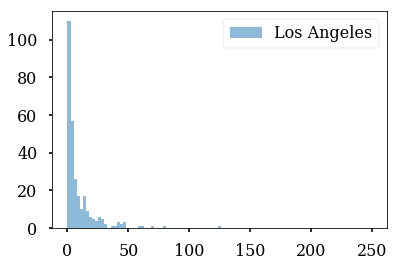

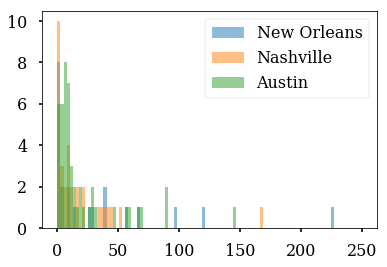

In [87]:
# fig, (ax1,ax2,ax3,ax4) = plt.subplot(2, 2, 1)
bins = np.linspace(0, 250, 100)
plt.hist(demand[demand['metro']=='LA']['airbnb_10khousehold'].values, bins=bins, alpha=0.5, label='Los Angeles')
plt.legend(loc='upper right')
plt.show()
plt.hist(demand[demand['metro']=='new_orleans']['airbnb_10khousehold'].values, bins=bins, alpha=0.5, label='New Orleans')
plt.hist(demand[demand['metro']=='nashville']['airbnb_10khousehold'].values, bins=bins, alpha=0.5, label='Nashville')
plt.hist(demand[demand['metro']=='austin']['airbnb_10khousehold'].values, bins=bins, alpha=0.5, label='Austin')
plt.legend(loc='upper right')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1347691d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13330c780>]], dtype=object)

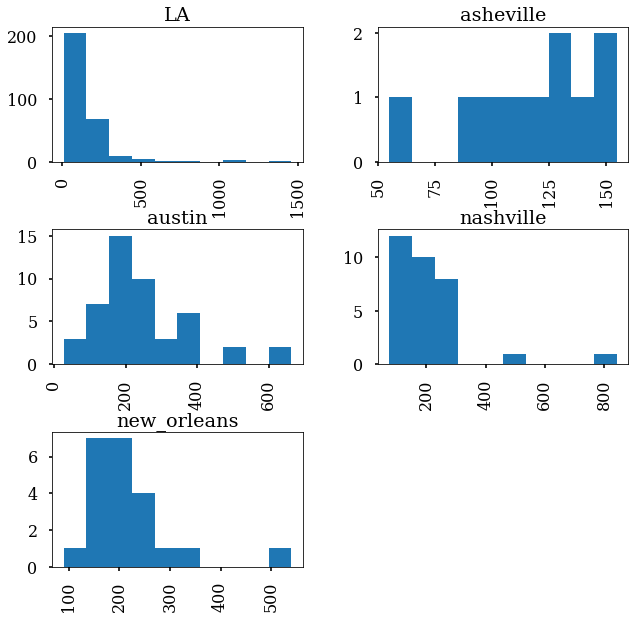

In [64]:
demand['airbnb_avg_price'].hist(by=demand['metro'],figsize=(10,10))

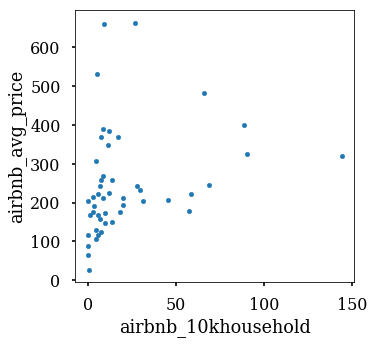

In [66]:
demand[demand.metro=='austin'].plot.scatter(x='airbnb_10khousehold',y='airbnb_avg_price',figsize=(5,5))